# **Lab 7: Linear Regression Part II**
---

### **Description**

In this week's lab, we will learn how to implement linear regression models on artificial data, evaluate these models, and make inferences from them by looking at their coefficients.

<br>

### **Structure**

**Part 1**: [Review](#p1)

**Part 2**: [Model Evaluation](#p2)

**Part 3**: [A Deeper Look at Inference](#p3)


<br>

### **Learning Objectives**

By the end of this lab, you will:
* Understand how to implement Linear Regression models with sklearn and access/interpret their parameters.
* Recognize how to evaluate Linear Regression models in sklearn.

<br>

### **Resources**
* [Linear Regression with sklearn Updated](https://docs.google.com/document/d/1DPUqouqGKeAYBfNBoHNsKRoQGXfD7mjUAvjjK0VsLbc/edit?usp=sharing)


<br>

**Run the code below before continuing.**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

<a name="p1"></a>

---
## **Part 1: Review**
---

In this section, we will review what we saw last week in a condensed format using an artifically created dataset.


We can make our artificial dataset by changing the parameters in the following function call:

```python
inputs, output = make_regression(n_samples = 1000, n_features = 1, noise = 0, random_state = 42)

```

where the parameters are:

* `n_samples`: the size of the dataset. Formally the number of samples.
* `n_features`: the number of features in our data.
* `noise`: the amount of noise in the data. If this is 0, the data is a perfect line (not very realistic). The higher this gets, the more randomly spread out the data gets.
* `random_state`: this is the same as for `train_test_split(...)` where setting it to the same number creates the same dataset every single time. We will use this so that we can all make sure we see the same results.




<br>

You can find the full `make_regression` [documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html).

#### **Problem #1.1**

**Run the code below to create an artificial dataset.**

In [ ]:
from sklearn.datasets import make_regression

inputs, output = make_regression(# COMPLETE THIS CODE

##### **Solution**

In [ ]:
from sklearn.datasets import make_regression

inputs, output = make_regression(n_samples = 1000, n_features = 1, noise = 0, random_state = 42)

#### **Problem #1.2**

We could put this data into a pandas DataFrame and use `head()` to look at our artificial dataset. However, it will be more useful to visualize it using a scatter plot since there is no real meaning behind the features.

In [ ]:
plt.figure(figsize = (8, 5))

plt.scatter(# COMPLETE THIS CODE

plt.title("Artificial Dataset", fontsize = "x-large")
plt.xlabel("Feature")
plt.ylabel("Output")

plt.show()

##### **Solution**

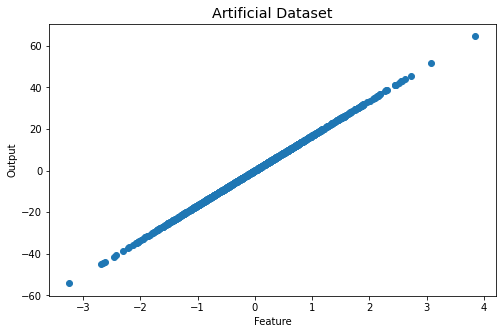

In [ ]:
plt.figure(figsize = (8, 5))
plt.scatter(inputs, output)

plt.title("Artificial Dataset", fontsize = "x-large")
plt.xlabel("Feature")
plt.ylabel("Output")

plt.show()

We provided the parameters:
```python
n_samples = 1000, n_features = 1, noise = 0, random_state = 42
```

This means there are 1000 data points with only 1 feature (input/x value). We have chosen 1 feature to make this easier to visualize and work with.

Since there is 0 noise, we should see the data form a perfect line. Next, we will add some noise to see how this changes things.

#### **Problem #1.3**

A perfect line like this is unrealistic since there's usually some error or "noise" in the data that's collected in the real world.

**Write code below that creates an artificial dataset with a noise of 10. Then create a scatter plot of this data.**

In [ ]:
# CREATE THE DATASET

inputs, output = # COMPLETE THIS CODE

In [ ]:
# PLOT THE DATASET

plt.figure(figsize = (8, 5))

# COMPLETE THIS CODE

plt.show()

##### **Solution**

In [ ]:
# CREATE THE DATASET

inputs, output = make_regression(n_samples = 1000, n_features = 1, noise = 10, random_state = 42)

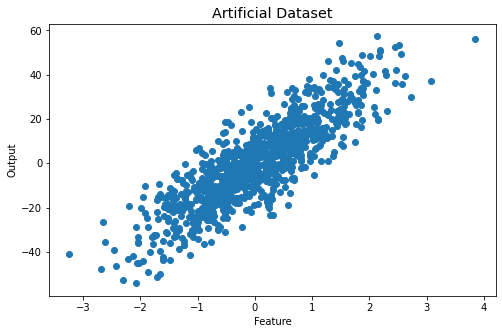

In [ ]:
# PLOT THE DATASET

plt.figure(figsize = (8, 5))
plt.scatter(inputs, output)

plt.title("Artificial Dataset", fontsize = "x-large")
plt.xlabel("Feature")
plt.ylabel("Output")

plt.show()

#### **Problem #1.4**


We will now complete **Steps #2 - 6: Create the Model**.


In the space below, take the noisy input and output data created above and create a Linear Regression model. As a reminder Steps #2 - 6 are:

**Step 2**: Decide our variables (There's nothing to do here!)

**Step 3**: Split data into training and test sets

**Step 4**: Import our model from sklearn

**Step 5**: Initialize our model

**Step 6**: Fit our model on the training data

<br>


**NOTE**: Remember that the cheat sheet containing a lot of this information is provided up above.

In [ ]:
# STEP 3: Split data
#====================
X_train, X_test, y_train, y_test = # COMPLETE THIS CODE


# STEP 4: Import model
#=====================
from sklearn.linear_model import LinearRegression


# STEP 5: Initialize model
#=========================
model = # COMPLETE THIS CODE


# STEP 6: Fit model
#==================
model.# COMPLETE THIS CODE

##### **Solution**

In [ ]:
# STEP 3: Split data
#====================
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)


# STEP 4: Import model
#=====================
from sklearn.linear_model import LinearRegression


# STEP 5: Initialize model
#=========================
model = LinearRegression()


# STEP 6: Fit model
#==================
model.fit(X_train, y_train)

#### **Problem #1.5**

Now, complete Step #7. Specifically, use your model to make predictions on the test dataset and visualize how this compares to the actual data.

In [ ]:
# Make Predictions on test set
predictions = # COMPLETE THIS CODE

# Visualize comparison of predictions vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(# COMPLETE THIS CODE
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Value', fontsize = 'x-large')
plt.ylabel('Predicted Value', fontsize = 'x-large')
plt.title("Real vs Value", fontsize = 'x-large')
plt.legend()

plt.show()

##### **Solution**

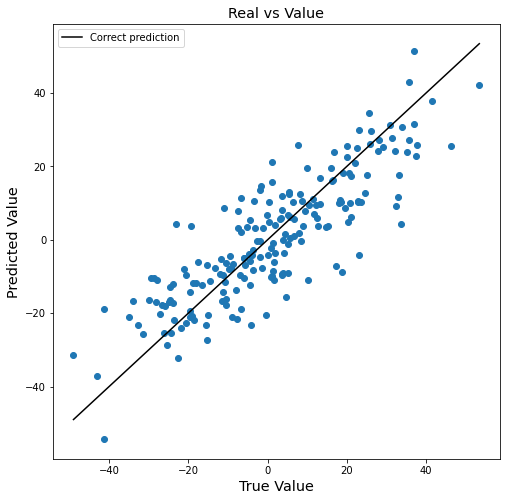

In [ ]:
# Make Predictions on test set
predictions = model.predict(X_test)

# Visualize comparison of predictions vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Value', fontsize = 'x-large')
plt.ylabel('Predicted Value', fontsize = 'x-large')
plt.title("Real vs Value", fontsize = 'x-large')
plt.legend()

plt.show()

<a name="p2"></a>

---
## **Part 2: Model Evaluation**
---

In this section, we will see how to implement evaluation metrics for linear regression, including how to check for homoscedasticity.


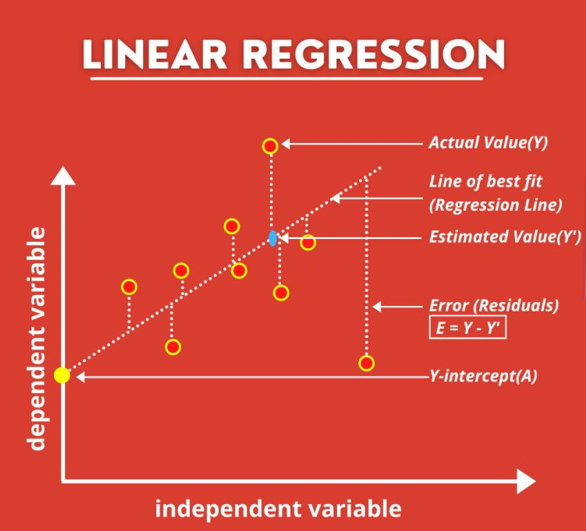

#### **Problem #2.1**

Before we can trust our evaluation metrics, we need to make sure that the residuals behave appropriately: randomly distributed around 0. If this is the case, we call the residuals **homoscedastic**. Although this sounds like a very fancy word all it means is that the residuals are considered normal. And checking for this is actually pretty straightforward!

**Together**, let's plot the residuals for each test point and confirm that they are randomly distributed around 0.

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

##### **Solution**

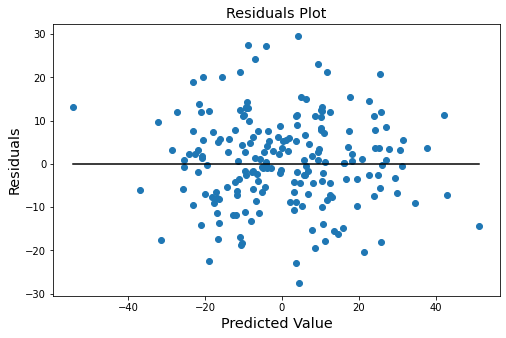

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

#### **Problem #2.2**

Complete the code below to see the:

* $R^2$ score
* Mean squared error (MSE)
* Mean absolute error (MAE)


What do each of these numbers mean?

In [ ]:
from sklearn.metrics import *

print("R-squared: " + str(r2_score(y_test, predictions)))
print("Mean Squared Error: " + str(mean_squared_error(# COMPLETE THIS CODE
print("Mean Absolute Error: " + str(mean_absolute_error(# COMPLETE THIS CODE

##### **Solution**

In [ ]:
from sklearn.metrics import *

print("R-squared: " + str(r2_score(y_test, predictions)))
print("Mean Squared Error: " + str(mean_squared_error(y_test, predictions)))
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, predictions)))

R-squared: 0.7188122876167204
Mean Squared Error: 107.89991869915974
Mean Absolute Error: 8.17151494788362


#### **Problem #2.3**

Now, practice these steps by doing the following:

1. Create a new artifical dataset with `n_samples = 1000`, `n_features = 1`, `noise = 30`, and `random_state = 42`.

2. Train a Linear Regression model on this data and visualize the predictions vs. actual values on the test set.

3. Plot the residuals to check that they are homoscedastic (randomly distributed around 0).

4. Determine the $R^2$, MSE, and MAE.


##### **1.**

Create a new artifical dataset with `n_samples = 1000`, `n_features = 1`, `noise = 30`, and `random_state = 42`.

In [ ]:
inputs, output = # COMPLETE THIS CODE

###### **Solution**

In [ ]:
inputs, output = make_regression(n_samples = 1000, n_features = 1, noise = 30, random_state = 42)

##### **2.**

Train a Linear Regression model on this data and visualize the predictions vs. actual values on the test set.

In [ ]:
# STEP 3: Split data
#====================
X_train, X_test, y_train, y_test = # COMPLETE THIS CODE


# STEP 4: Import model
#=====================
from sklearn.linear_model import  # COMPLETE THIS CODE


# STEP 5: Initialize model
#=========================
 # COMPLETE THIS CODE


# STEP 6: Fit model
#==================
 # COMPLETE THIS CODE

In [ ]:
# Make Predictions on test set
predictions = model.# COMPLETE THIS CODE

# Visualize comparison of predictions vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Value', fontsize = 'x-large')
plt.ylabel('Predicted Value', fontsize = 'x-large')
plt.title("Real vs Value", fontsize = 'x-large')
plt.legend()

plt.show()

###### **Solution**

In [ ]:
# STEP 3: Split data
#====================
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)


# STEP 4: Import model
#=====================
from sklearn.linear_model import LinearRegression


# STEP 5: Initialize model
#=========================
model = LinearRegression()


# STEP 6: Fit model
#==================
model.fit(X_train, y_train)

LinearRegression()

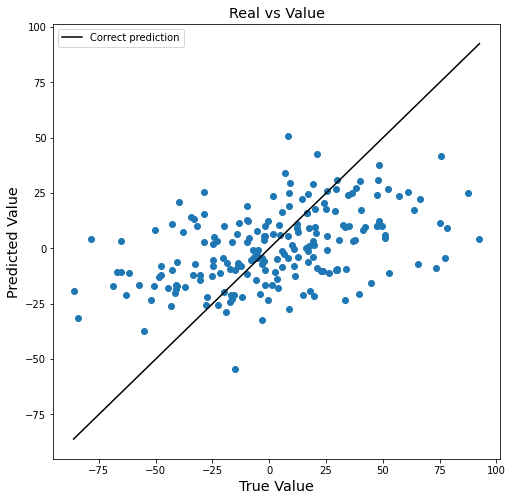

In [ ]:
# Make Predictions on test set
predictions = model.predict(X_test)

# Visualize comparison of predictions vs. actual values
plt.figure(figsize=(8, 8))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color = 'black', label="Correct prediction")


plt.xlabel('True Value', fontsize = 'x-large')
plt.ylabel('Predicted Value', fontsize = 'x-large')
plt.title("Real vs Value", fontsize = 'x-large')
plt.legend()

plt.show()

##### **3.**

Plot the residuals to check that they are homoscedastic (randomly distributed around 0).

In [ ]:
residuals = y_test - predictions

plt.figure(figsize = (8, 5))
plt.scatter(# COMPLETE THIS CODE

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

###### **Solution**

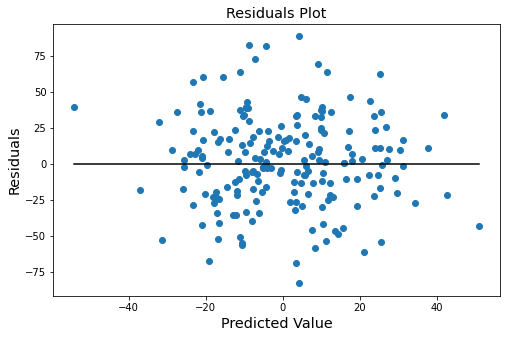

In [ ]:
residuals = # COMPLETE THIS CODE

plt.figure(figsize = (8, 5))
plt.scatter(predictions, residuals)

plt.plot([predictions.min(), predictions.max()], [0, 0], color = "black")


plt.title("Residuals Plot", fontsize = "x-large")
plt.xlabel("Predicted Value", fontsize = "x-large")
plt.ylabel("Residuals", fontsize = "x-large")

plt.show()

##### **4.**

Determine the  $𝑅^2$ , MSE, and MAE.

In [ ]:
from sklearn.metrics import *

print("R-squared: " + str(r2_score(y_test, predictions)))
print("Mean Squared Error: " + str(mean_squared_error(y_test, predictions)))
print("Mean Absolute Error: " + str(mean_absolute_error(y_test, predictions)))

R-squared: 0.20004460696632287
Mean Squared Error: 971.0992682924376
Mean Absolute Error: 24.514544843650864


Looking over your results, is this model's performance better, the same, or worse than the last model's performance? Why might this be?

<a name="p3"></a>

---
## **Part 3: A Deeper Look at Inference**
---

In this section, we will see how to combine what we learned last week with new techniques for infering relationships from linear models.


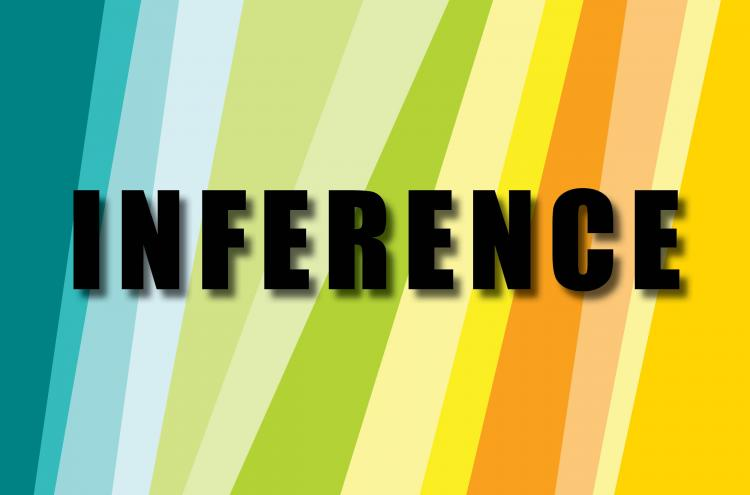

#### **Problem #3.1**

Let's start by seeing how we can look at the coefficients that a model has estimated. We will use an artifical dataset, but pretend that it corresponds to the prediction of the score that students get on a test and 3 features: Hours Studying, Hours Sleep, and Height.

Specifically,

1. Run the provided code to create this dataset.

2. Use `model.coef_` to view the coefficients.

3. Compare to the true coefficients (we can only do this for artificial data).

##### **1.**

Run the provided code to create this dataset.

In [ ]:
# STEPS 1 - 2: Load in data and decide our variables
inputs, output, true_coef = make_regression(n_samples = 1000, n_features = 3, n_informative = 2, coef = True, noise = 10, random_state = 42)


# STEP 3: Split data
#====================
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)


# STEP 4: Import model
#=====================
from sklearn.linear_model import LinearRegression


# STEP 5: Initialize model
#=========================
model = LinearRegression()


# STEP 6: Fit model
#==================
model.fit(X_train, y_train)

LinearRegression()

##### **2.**

Use `model.coef_` to view the coefficients.

In [ ]:
coefficents = pd.DataFrame([model.# COMPLETE THIS CODE], columns = ["Hours Studying", "Hours Sleep", "Height"])

coefficents

###### **Solution**

In [ ]:
coefficents = pd.DataFrame([model.coef_], columns = ["Hours Studying", "Hours Sleep", "Height"])

coefficents

   Hours Studying  Hours Sleep    Height
0       96.624778    80.824399 -0.196309


Based on these coefficients, we can answer exactly how much each of these features impact the predicted result and how they compare.

##### **3.**

Because this dataset is artifical, we can actually get the true coefficients that we are trying to learn. This is information we could almost never possibly access in the real world. But here, it is a great way to see just how good our model is!

**Run the code below and compare to the coefficients estimated by our model.**

In [ ]:
true_coefficents = pd.DataFrame([true_coef], columns = ["Hours Studying", "Hours Sleep", "Height"])

print(true_coefficents)

   Hours Studying  Hours Sleep  Height
0       98.356721    81.874023     0.0


#### **Problem #3.2**

Let's apply these skills to real data!

In the lab last week, we explored the relationship bewteen a variety of factors and the price of Californian houses in 1990. Let's review the techniques we used to infer the relationships between median income, population, and the median price for houses.

Specifically,

1. Import the dataset using the provided code and train a linear regression model on it with `MedianValue` as the output and the rest of the columns as features. Make predictions on the test set using this data.

2. Plot these predictions versus the median income feature (the `MedInc` column) to visualize the modelled relationship between these variables.

3. Plot these predictions versus the population feature (the `Population` column) to visualize the modelled relationship between these variables.


##### **1.**

Import the dataset using the provided code and train a linear regression model on it with MedianValue as the output and the rest of the columns as features. Make predictions on the test set using this data.

In [ ]:
# STEP 1: Load in data
from sklearn.datasets import fetch_california_housing

cali_data = fetch_california_housing()
df = pd.DataFrame(data=cali_data.data, columns=cali_data.feature_names)
df['MedianValue'] = cali_data.target

In [ ]:
# STEPS 2 - 6: Create the model
#==============================

# STEPS 2 - 3
inputs = df.drop("MedianValue", axis = 1)
output = df[# COMPLETE THIS CODE
X_train, X_test, y_train, y_test = train_test_split(# COMPLETE THIS CODE


# STEPS 4 - 7
from sklearn.linear_model import # COMPLETE THIS CODE
model = # COMPLETE THIS CODE
# COMPLETE THIS CODE

predictions = # COMPLETE THIS CODE

###### **Solution**

In [ ]:
# STEPS 2 - 6: Create the model
#==============================

# STEPS 2 - 3
inputs = df.drop("MedianValue", axis = 1)
output = df["MedianValue"]
X_train, X_test, y_train, y_test = train_test_split(inputs, output, test_size = 0.2, random_state = 42)


# STEPS 4 - 7
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

##### **2.**

Plot these predictions versus the median income feature (the `MedInc` column) to visualize the modelled relationship between these variables.

In [ ]:
median_income = X_test["MedInc"]

plt.figure(figsize = (10, 8))
plt.scatter(# COMPLETE THIS LINE

plt.title("Predicted Median House Price vs. Median Income", fontsize = 'x-large')
plt.xlabel("Median Income ($100,000)", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

###### **Solution**

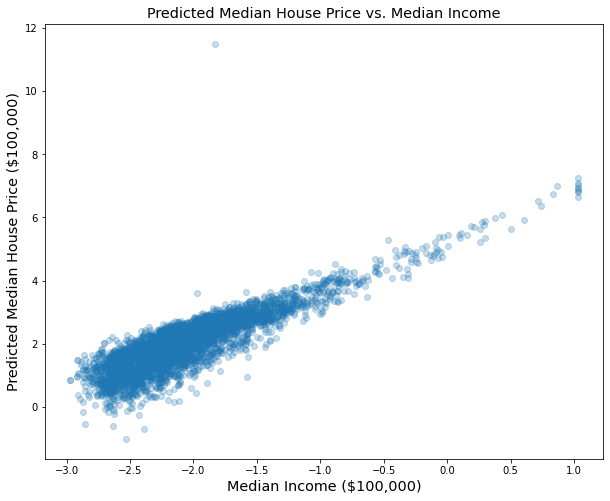

In [ ]:
median_income = X_test["MedInc"]

plt.figure(figsize = (10, 8))
plt.scatter(median_income, predictions, alpha = 0.25)

plt.title("Predicted Median House Price vs. Median Income", fontsize = 'x-large')
plt.xlabel("Median Income ($100,000)", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

##### **3.**

Plot these predictions versus the population feature (the `Population` column) to visualize the modelled relationship between these variables.

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(# COMPLETE THIS CODE

plt.xlim(0, 6000)

plt.title("Predicted Median House Price vs. Population", fontsize = 'x-large')
plt.xlabel("Population", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

###### **Solution**

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(population, predictions, alpha = 0.25)

plt.xlim(0, 6000)

plt.title("Predicted Median House Price vs. Population", fontsize = 'x-large')
plt.xlabel("Population", fontsize = 'x-large')
plt.ylabel("Predicted Median House Price ($100,000)", fontsize = 'x-large')

plt.show()

#### **Problem #3.3**

Now, let's dig deeper by looking at the coefficients produced by this model.


In [ ]:
coefficients = pd.DataFrame([model.coef_], columns = X_test.columns)

print(coefficients)

     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  0.854409   0.12255 -0.294419    0.33927   -0.002308  -0.04083 -0.896956   

   Longitude  
0  -0.869868  


Based on these coefficients, we can answer the following questions:
* How do we predict the median cost of houses will change if the median income goes up by $1?
* How do we predict the median cost of houses will change if the population increases by 1?
* How do we predict the median cost of houses will change every decade that a house has been around?
* And more!

---
#End of Notebook

© 2023 The Coding School, All rights reserved